##**CNN Network 1**
###**By : Maddy**


**Below are my learning/understanding for Convolution Neural Networks and the components which I have used in CNN notebook**



**Convolution**: Convolution refers to application of filters on input images to extract useful features from them like different edges, depth etc. It is motivated from human visula cortex system. Each convolution helps to detect different features from the image.




**Filter**: It is matrix with a data pattern to detect different features from input image. It is traveresed through all the pixels of input image(matrix) and a element wise dot product is taken.

**Padding**: Whenever a filter is applied on input image the output shrinks and to keep the matrix size constant padding is used.

**Strides**: Stride determines the jump from one dot product to another. And it also helps to control overlap between dot products.


**Pooling**: It is kind of a technique used for downsampling. It helps in reduction of number of weights. It helps in avoiding overfitting. It also reduced spatial dimensions. There are different types of pooling like average pooling , max pooling etc.
Max pooling takes of filter of size X and stride of same size and takes olny the max element from that spatial dimension.


**Activation**: Activation functions are mainly used to get non linearity into the picture. After each convolution layer we use a activation function to make the network non linear. Earlier activation functions like Tan H or Sigmoid were used but these days Relu is more common with CNNs as it trains faster and helps avoid problem of vanishing gradient. We add non linearity to make the model to adapt generalization.

**RELU ( Rectified Linear Units):**  Its function and derivite both are monotonic. It partially rectifies the input. It make all negative inputs to zero so it may not be able to map negative values properly.

***Function Relu =  max(0,x)***

It is used in almost most of the Convolutional Neural Networks

**DroupOut**: Droupout technique is used as a regularization in deep neural networks so as to reduce overfitting. In this technique some of the neurons get shut down and they are not a part of any fordward or backward pass.

**Dense Layer / Fully Connected Layer: ** It is a linear operation where all the outputs of Convolution layer are fully connected to dense layer. And after that a non linear activation function is used. As the convolution layer has extracted all the features the dense layer is used as a scalar classification layer.

**Flatten** : It is used to make a (mXn) matrix input into 1D vector so that we can get scalar classified output.

**Batch Normalization**:  It refers to implementation of normalisation in deep layers of neural networks. As the networks gets complex the inputs of subsequent layers starts to get shift from the original scale so by normalising the inputs of some layers this can be avoided. This shifting is known as internal covariate shift. Batch Normalization helps in training the model faster as larger learning rate can be used and it also acts as weak regularizer. It performs shifting and scaling using alpha and beta parameters while are to be learned while training. 
BN : alpha*xi' + beta.


**Transfer Learning:**  Its not possible for all to have humongous amount of data and as we know that deep learning is fruitful with large data only. But in that case we can use pretrained model on our smaller dataset. The convolution layers can be used as a feature extracter for our model and the last few classification layer can be fine tuned or some high level CNN layers. 

If the data set is completely different and enough then we can go for training the CNN from scratch.

**Data Augmentation**: As in CNN we are dealing with image data and we don't want our model to be restricted to spatial dimension so we kind of manipulate the input data to be trained for different spatial scenarios like flipping , zooming , blurring etc.

In [0]:
from IPython.display import Image , display

In [0]:
from google.colab import files
uploaded = files.upload()

Saving first.png to first.png


## CNN Architecture

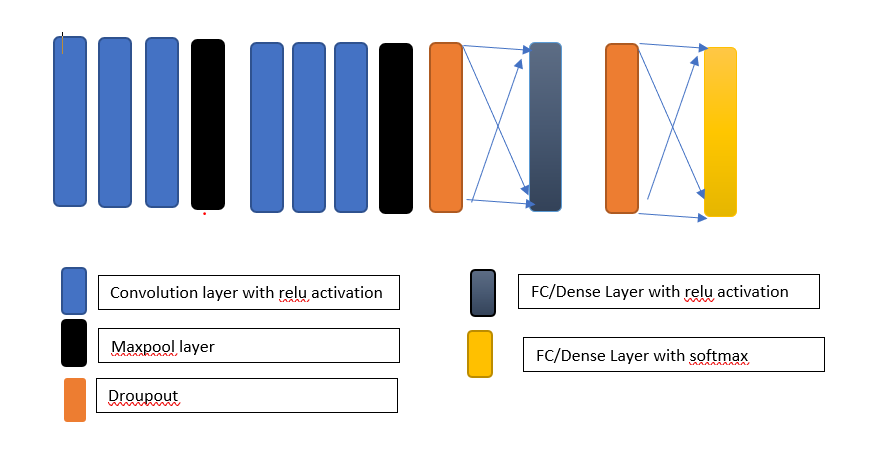

In [0]:
Image("first.png")
display(Image("first.png",width=700, height=400))

**Filter = 5*5 **

**Padding = same**

**MaxPool Pool Size = 2*2**

**Optimizer = Adadelta **

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 372us/step - loss: 0.2722 - acc: 0.9148 - val_loss: 0.0484 - val_acc: 0.9841
Epoch 2/12
60000/60000 [==============================] - 20s 335us/step - loss: 0.0651 - acc: 0.9817 - val_loss: 0.0283 - val_acc: 0.9912
Epoch 3/12
60000/60000 [==============================] - 20s 333us/step - loss: 0.0441 - acc: 0.9877 - val_loss: 0.0215 - val_acc: 0.9928
Epoch 4/12
60000/60000 [==============================] - 20s 333us/step - loss: 0.0353 - acc: 0.9901 - val_loss: 0.0280 - val_acc: 0.9919
Epoch 5/12
60000/60000 [==============================] - 20s 332us/step - loss: 0.028

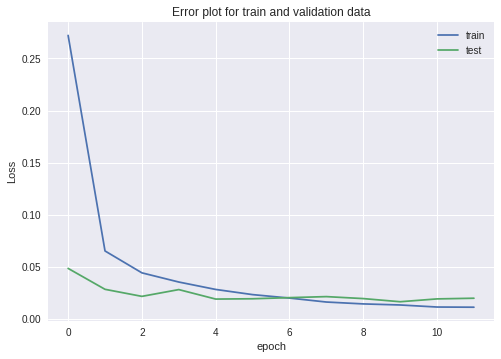

In [0]:

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',padding='same',
                 input_shape=input_shape))
model.add(Conv2D(32, (5, 5),padding='same', activation='relu'))
model.add(Conv2D(32, (5, 5),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (5, 5),padding='same', activation='relu'))
model.add(Conv2D(64, (5, 5),padding='same', activation='relu'))
model.add(Conv2D(64, (5, 5),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

cnnmodel=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(cnnmodel.history['loss'])
plt.plot(cnnmodel.history['val_loss'])
plt.title('Error plot for train and validation data')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()